In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv("/content/insurance.csv")

# Show info
df.info()


print("Dataset preview:")
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Dataset preview:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())


Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Statistical Summary:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
# Correlation Matrix
corr = df.corr(numeric_only=True)
print("\nCorrelation with Charges:\n", corr['charges'].sort_values(ascending=False))


Correlation with Charges:
 charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [ ]:

print("\nCategorical Variables:")
for col in ['sex', 'smoker', 'region']:
    print(f"\n{col}:", df[col].value_counts().to_dict())



Categorical Variables:

sex: {'male': 676, 'female': 662}

smoker: {'no': 1064, 'yes': 274}

region: {'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}



Correlation with Charges:
 charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


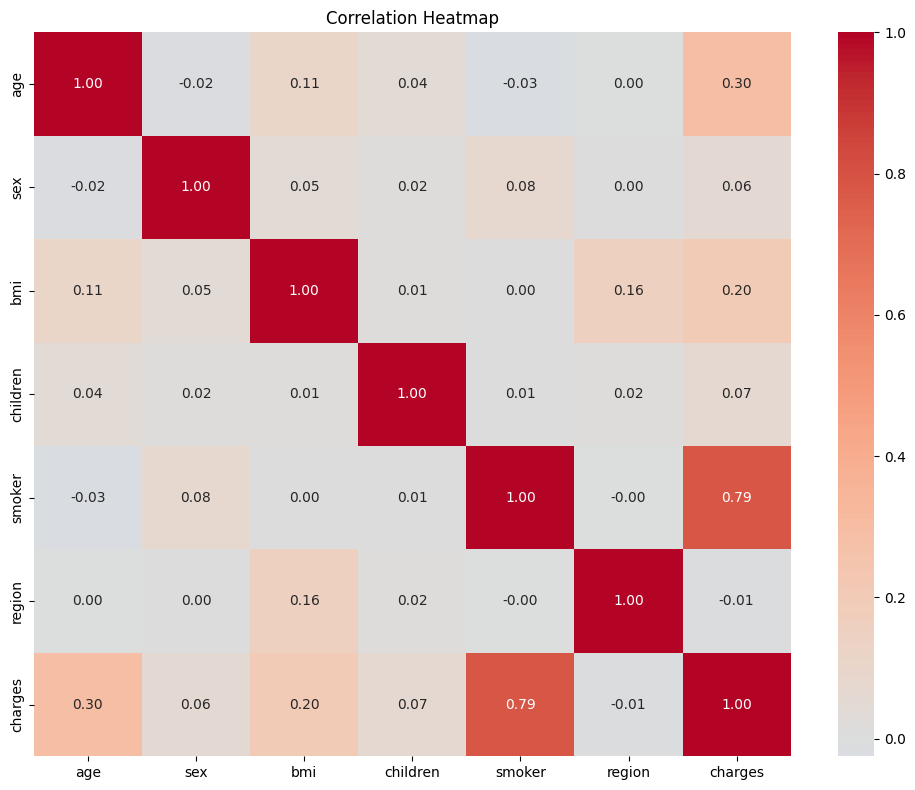

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables for correlation
df_encoded = df.copy()
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df_encoded[col] = le.fit_transform(df[col])

corr = df_encoded.corr()
print("\nCorrelation with Charges:\n", corr['charges'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['age']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 1070 samples
Test set: 268 samples


In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:

print("\n=== MODEL PERFORMANCE ===")
print(f"\nIntercept (b0): {model.intercept_:.2f}")
print(f"Coefficient (b1): {model.coef_[0]:.2f}")

print("\n--- Training Set ---")
print(f"R² Score: {r2_score(y_train, y_train_pred):.4f}")
print(f"MAE: ${mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

print("\n--- Test Set ---")
print(f"R² Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")



=== MODEL PERFORMANCE ===

Intercept (b0): 3876.93
Coefficient (b1): 240.60

--- Training Set ---
R² Score: 0.0794
MAE: $9042.42
RMSE: $11527.29

--- Test Set ---
R² Score: 0.1241
MAE: $9173.26
RMSE: $11661.22


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


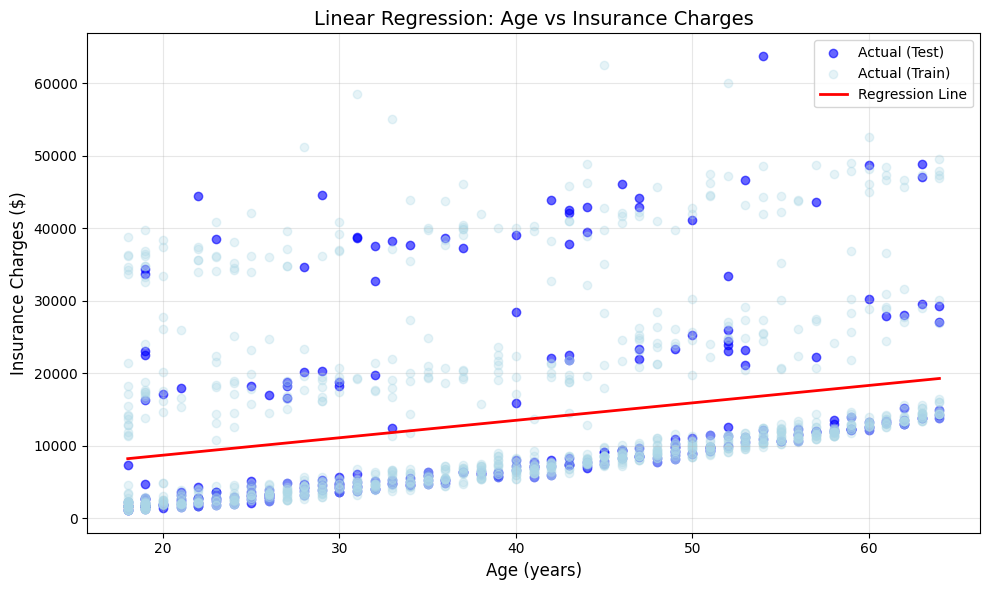

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual (Test)', color='blue')
plt.scatter(X_train, y_train, alpha=0.3, label='Actual (Train)', color='lightblue')

# Regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Age vs Insurance Charges', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Insurance Charges ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


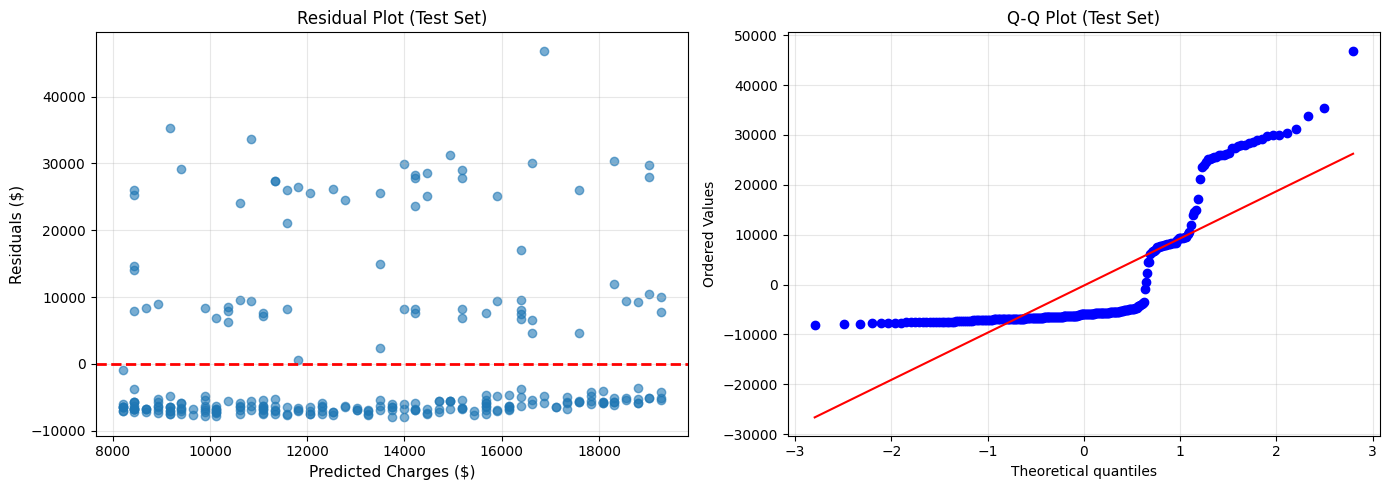

In [ ]:
import scipy.stats as stats
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual Plot
axes[0].scatter(y_test_pred, residuals_test, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Residual Plot (Test Set)', fontsize=12)
axes[0].set_xlabel('Predicted Charges ($)', fontsize=11)
axes[0].set_ylabel('Residuals ($)', fontsize=11)
axes[0].grid(alpha=0.3)

# Q-Q Plot for normality check
stats.probplot(residuals_test, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Test Set)', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


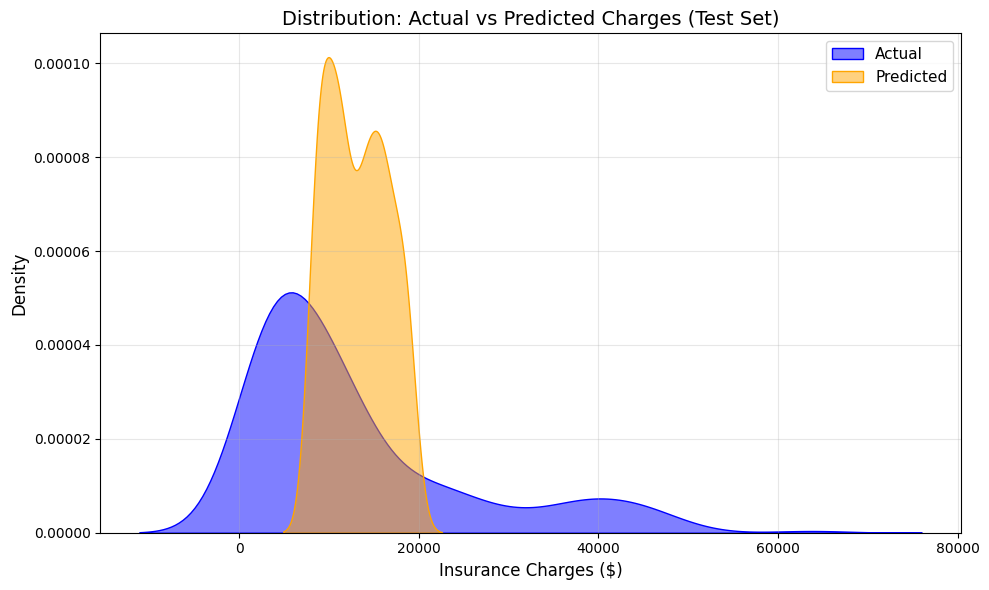

In [ ]:
# Cell 9: Distribution Comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.5, color='blue')
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.5, color='orange')
plt.title("Distribution: Actual vs Predicted Charges (Test Set)", fontsize=14)
plt.xlabel('Insurance Charges ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


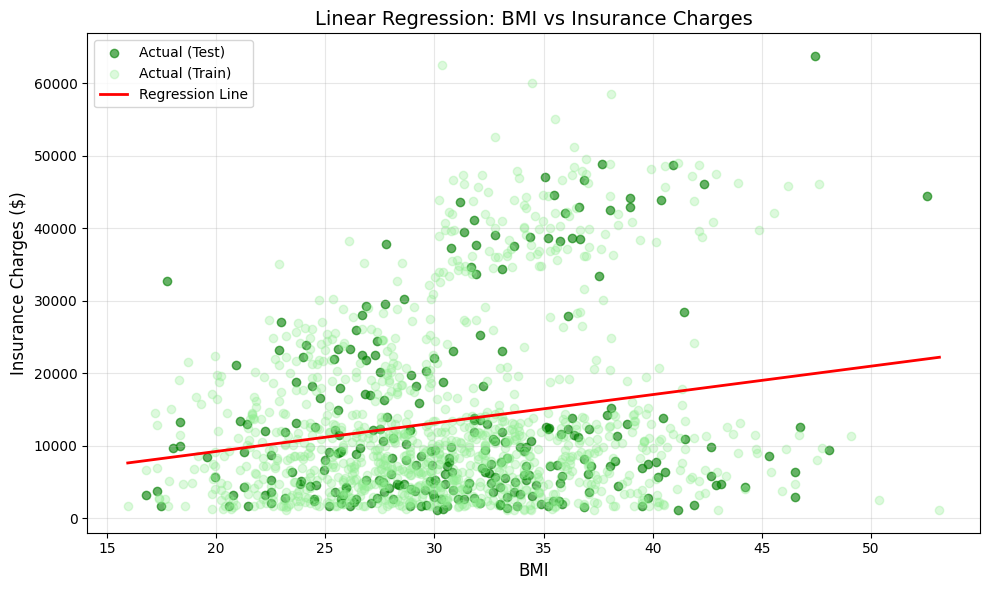


BMI Model - Test R² Score: 0.0397
BMI Model - Test RMSE: $12210.04


In [ ]:
# Cell 10: BMI vs Charges Analysis
X_bmi = df[['bmi']]
X_bmi_train, X_bmi_test, y_bmi_train, y_bmi_test = train_test_split(
    X_bmi, y, test_size=0.2, random_state=42
)

# Train BMI model
model_bmi = LinearRegression()
model_bmi.fit(X_bmi_train, y_bmi_train)
y_bmi_test_pred = model_bmi.predict(X_bmi_test)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_bmi_test, y_bmi_test, alpha=0.6, label='Actual (Test)', color='green')
plt.scatter(X_bmi_train, y_bmi_train, alpha=0.3, label='Actual (Train)', color='lightgreen')

X_bmi_range = np.linspace(X_bmi.min(), X_bmi.max(), 100).reshape(-1, 1)
y_bmi_range_pred = model_bmi.predict(X_bmi_range)
plt.plot(X_bmi_range, y_bmi_range_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: BMI vs Insurance Charges', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Insurance Charges ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nBMI Model - Test R² Score: {r2_score(y_bmi_test, y_bmi_test_pred):.4f}")
print(f"BMI Model - Test RMSE: ${np.sqrt(mean_squared_error(y_bmi_test, y_bmi_test_pred)):.2f}")
